# visualize hpatches results

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_12627/3694288017.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### repeatability

In [3]:
# folders
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread
def load_as_float(path):
    return imread(path).astype(np.float32)/255

# folder = ['superpoint_pretrained_hpatches']
# folder = ['superpoint_coco_heat2_0_170k_nms4_det0.015']
folder = ['superpoint_hpatches_test']

# parameters

scale = 10
count = 1

base_path = '../logs'
prediction = 'predictions'



In [4]:
# repeatibility

images_num = 5 # 50
rows = images_num
cols = len(folder)
plt.figure(figsize=(cols*2*scale, rows*scale))
task_folder = ['repeatibility3']
count = 1
offset = 0

for i in range(images_num):
#     path = image_paths[i]
    n = offset + i
    for j in range(cols):
        exp_path = Path(base_path, folder[j], prediction, task_folder[0])
        path = exp_path / (str(n) + '.png')
#         print("load from ", path)
        image = load_as_float(path)
        plt.subplot(rows, cols, count)
        count += 1
        plt.axis('off')
        plt.title(folder[j] + '/' + str(n))
        plt.imshow(image)
plt.show()


FileNotFoundError: No such file: '/home/ruizhu/Documents/Projects/pytorch-superpoint/logs/superpoint_hpatches_test/predictions/repeatibility3/0.png'

<Figure size 1440x3600 with 0 Axes>

In [18]:
i = 3
path = exp_path / (str(i) + '.png')
print("load from ", path)
image = load_as_float(path)


load from  ../logs/superpoint_coco_heat2_0_170k_nms4_det0.015/predictions/repeatibility3/3.png


### matchings - opencv
- Using opencv homography estimation.
- Only plot the inliers.

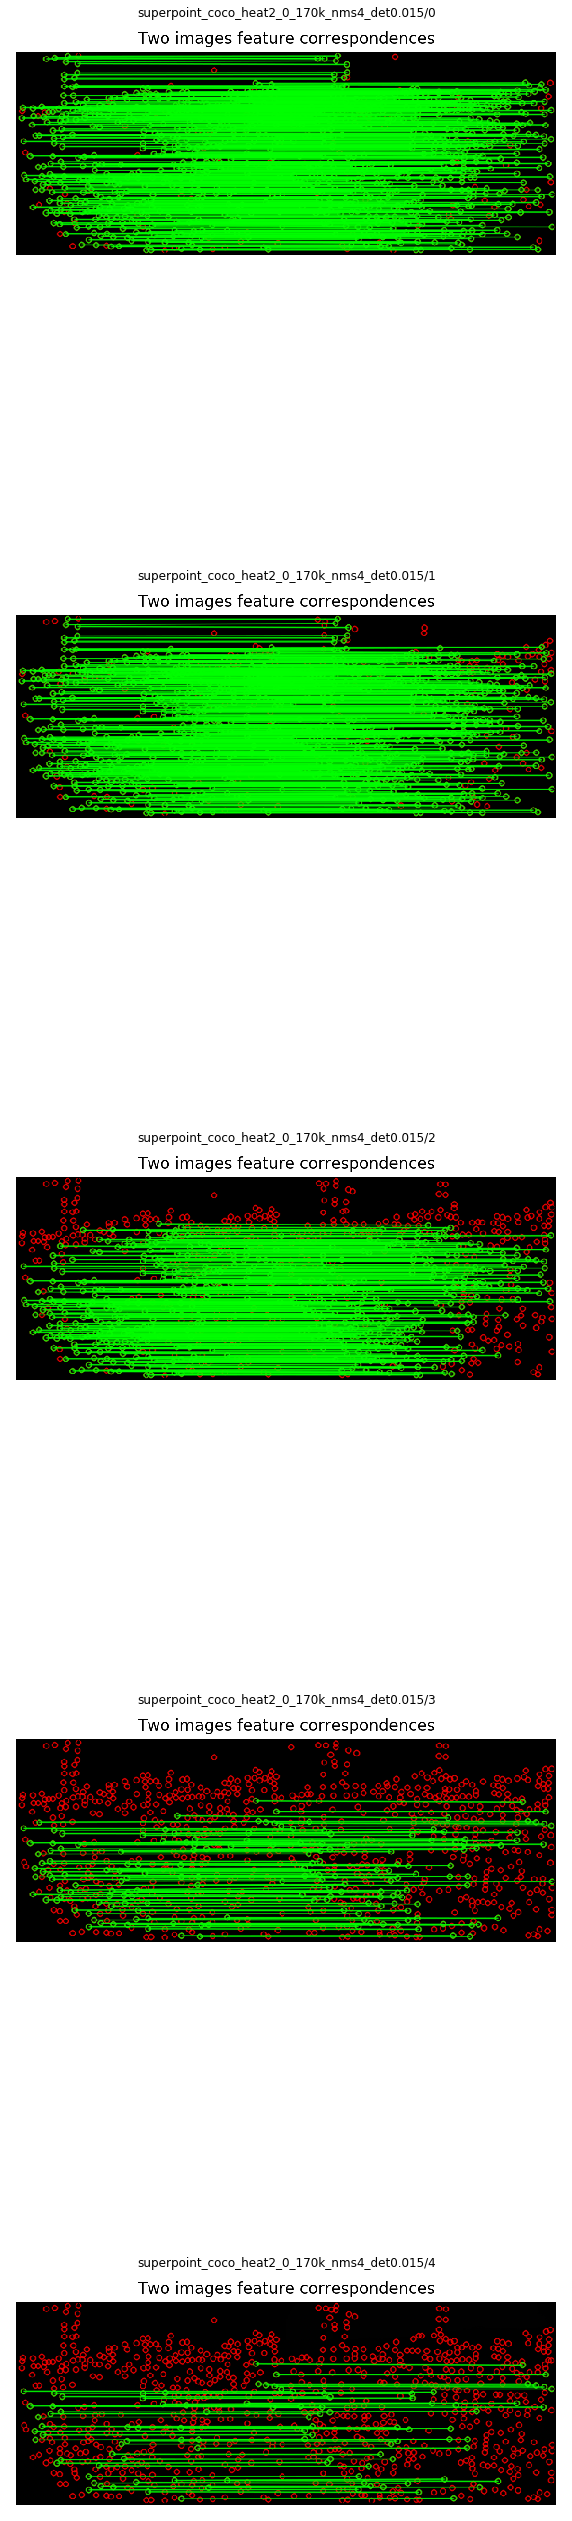

In [19]:
# show images
count = 1
images_num = 5
offset = 0
rows = images_num
plt.figure(figsize=(cols*scale, rows*scale))

task_folder = ['matching']
for i in range(images_num):
    n = offset + i
    for j in range(cols):
        exp_path = Path(base_path, folder[j], prediction, task_folder[0])
        path = exp_path / (str(n) + 'cv.png')
        image = load_as_float(path)
        plt.subplot(rows, cols, count)
        count += 1
        plt.axis('off')
        plt.title(folder[j] + '/' + str(n))
        plt.imshow(image)
plt.show()

### matching our function
- We use our 2-way nearest neighbor matching (under a threshold).
- We plot all the matchings including inliers and outliers.

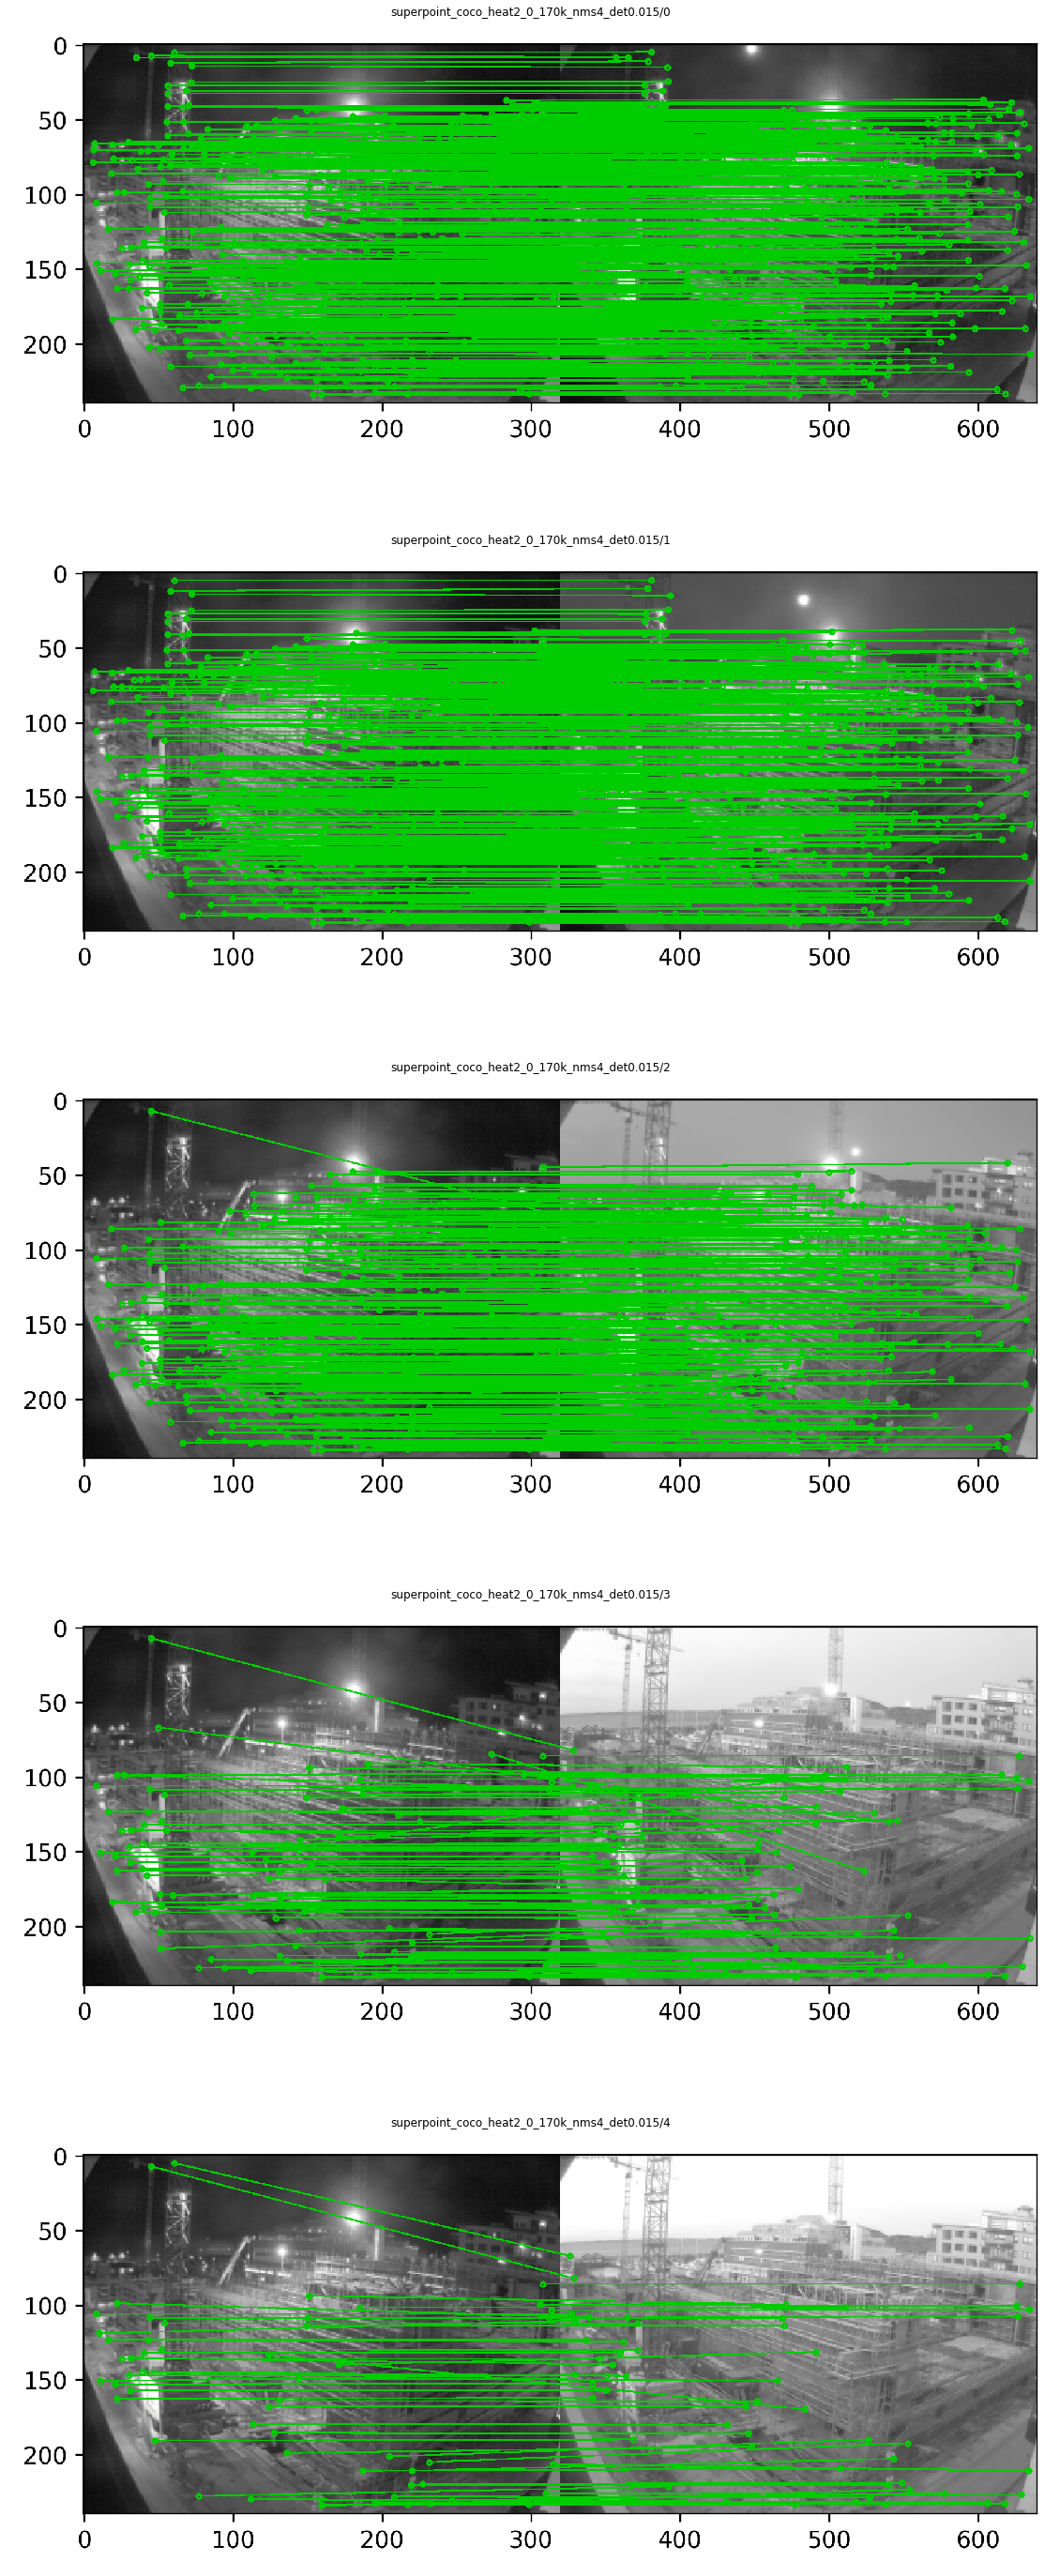

In [20]:
# show images
count = 1
images_num = 5
rows = images_num
plt.figure(figsize=(cols*2*scale, rows*scale))

task_folder = ['matching']
for i in range(images_num):
    for j in range(cols):
        exp_path = Path(base_path, folder[j], prediction, task_folder[0])
        path = exp_path / (str(i) + 'm.png')
        image = load_as_float(path)
        plt.subplot(rows, cols, count)
        count += 1
        plt.axis('off')
        plt.title(folder[j] + '/' + str(i))
        plt.imshow(image)
plt.show()

### Warp images visualization
- 1st column: original image
- 2nd column: warped image
- 3rd column: use the estimated homography to warp 1st image. 2nd and 3rd image should look similar.

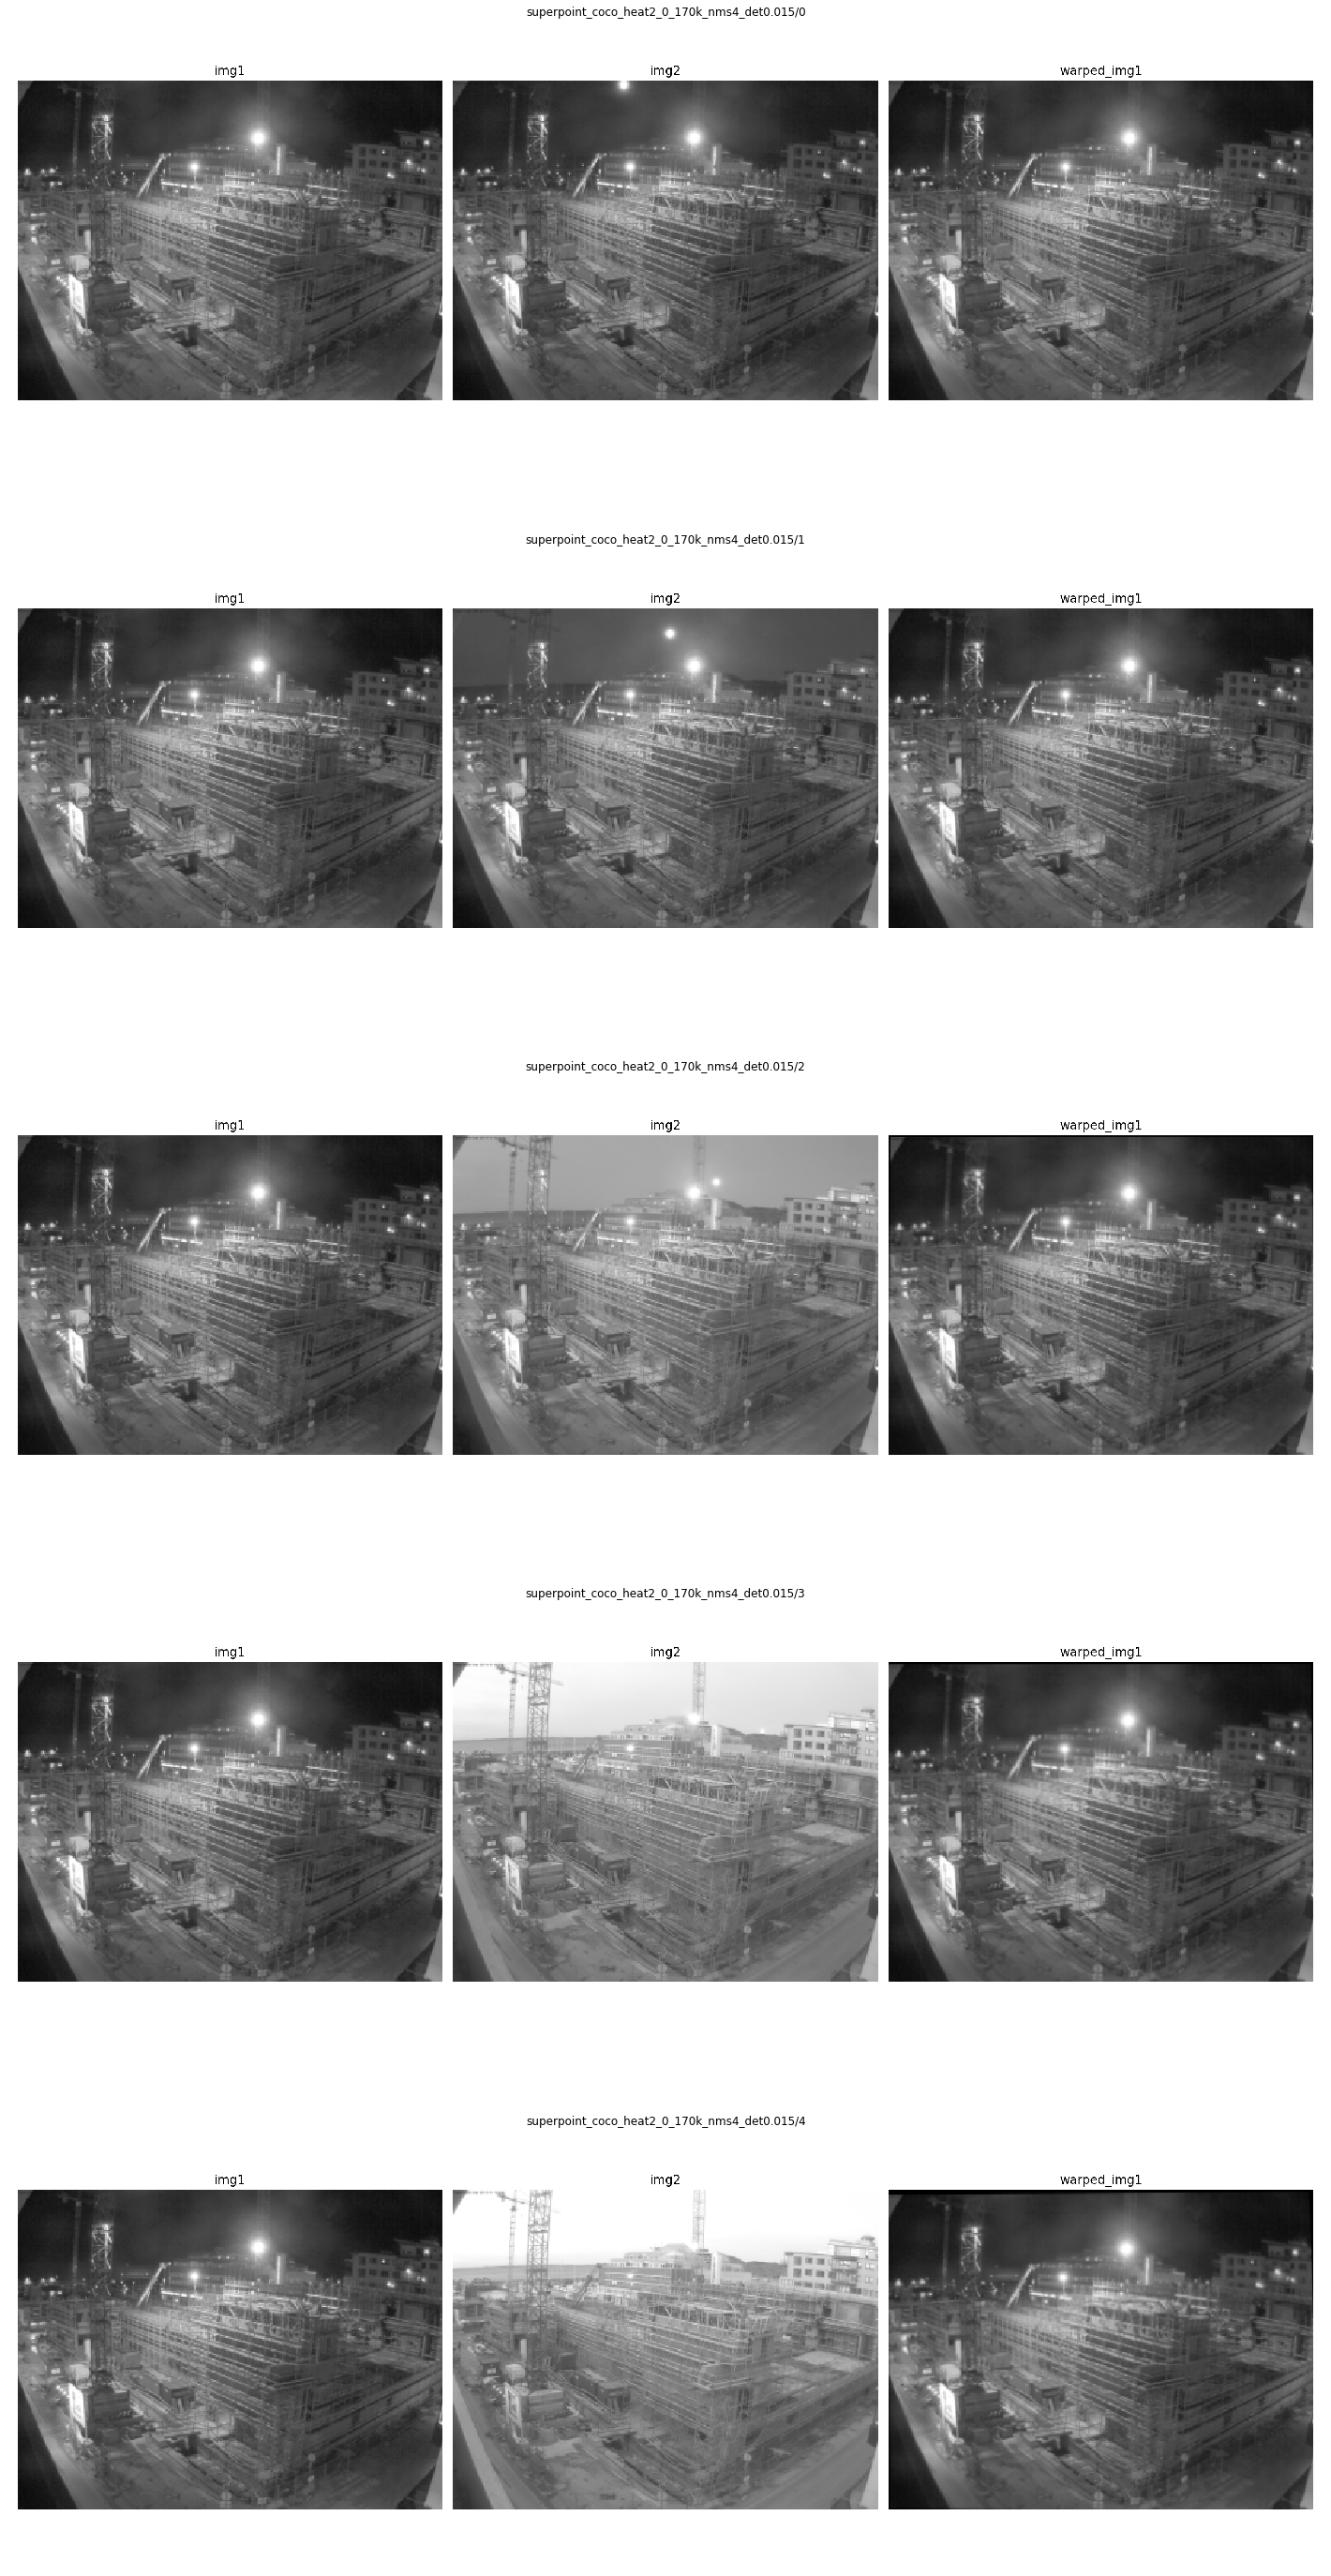

In [21]:
# show images
count = 1
images_num = 5
offset = 0
rows = images_num
plt.figure(figsize=(cols*3*scale, rows*scale))

task_folder = ['warping']
for i in range(images_num):
    n = offset + i
    for j in range(cols):
        exp_path = Path(base_path, folder[j], prediction, task_folder[0])
        path = exp_path / (str(n) + '.png')
        image = load_as_float(path)
        plt.subplot(rows, cols, count)
        count += 1
        plt.axis('off')
        plt.title(folder[j] + '/' + str(n))
        plt.imshow(image)
plt.show()